In [1]:
# import dependenices
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Weather base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

5 of Set 4 | yulara
Processing Record 6 of Set 4 | airai
Processing Record 7 of Set 4 | caravelas
Processing Record 8 of Set 4 | te anau
Processing Record 9 of Set 4 | jardim do serido
Processing Record 10 of Set 4 | karratha
Processing Record 11 of Set 4 | sulangan
Processing Record 12 of Set 4 | thai binh
Processing Record 13 of Set 4 | taybad
Processing Record 14 of Set 4 | olinda
Processing Record 15 of Set 4 | codrington
Processing Record 16 of Set 4 | dong hoi
Processing Record 17 of Set 4 | vila velha
Processing Record 18 of Set 4 | dikson
Processing Record 19 of Set 4 | talnakh
Processing Record 20 of Set 4 | maunabo
Processing Record 21 of Set 4 | samusu
City not found. Skipping...
Processing Record 22 of Set 4 | chapais
Processing Record 23 of Set 4 | harper
Processing Record 24 of Set 4 | satipo
Processing Record 25 of Set 4 | korsakovo
Processing Record 26 of Set 4 | clyde river
Processing Record 27 of Set 4 | korla
Processing Record 28 of Set 4 | faanui
Processing Record 2

In [8]:
len(city_data)

569

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alyangula,-13.8483,136.4192,71.64,89,81,6.04,AU,2021-07-13 18:02:33
1,Pisco,-13.7000,-76.2167,67.01,81,25,6.06,PE,2021-07-13 18:02:33
2,Albany,42.6001,-73.9662,80.51,83,86,9.46,US,2021-07-13 18:02:07
3,Talaya,61.3833,152.7500,53.29,90,80,0.11,RU,2021-07-13 18:02:34
4,Tuktoyaktuk,69.4541,-133.0374,44.64,92,98,15.57,CA,2021-07-13 18:02:34
5,Bredasdorp,-34.5322,20.0403,43.29,79,32,6.98,ZA,2021-07-13 18:02:35
6,Mar Del Plata,-38.0023,-57.5575,52.12,46,48,11.01,AR,2021-07-13 18:02:35
7,Norman Wells,65.2820,-126.8329,71.64,49,20,4.61,CA,2021-07-13 17:58:02
8,Jamestown,42.0970,-79.2353,85.08,73,40,14.97,US,2021-07-13 18:02:36
9,Tiksi,71.6872,128.8694,52.66,67,89,8.93,RU,2021-07-13 17:58:15


In [10]:
# reorder columns
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alyangula,AU,2021-07-13 18:02:33,-13.8483,136.4192,71.64,89,81,6.04
1,Pisco,PE,2021-07-13 18:02:33,-13.7000,-76.2167,67.01,81,25,6.06
2,Albany,US,2021-07-13 18:02:07,42.6001,-73.9662,80.51,83,86,9.46
3,Talaya,RU,2021-07-13 18:02:34,61.3833,152.7500,53.29,90,80,0.11
4,Tuktoyaktuk,CA,2021-07-13 18:02:34,69.4541,-133.0374,44.64,92,98,15.57
5,Bredasdorp,ZA,2021-07-13 18:02:35,-34.5322,20.0403,43.29,79,32,6.98
6,Mar Del Plata,AR,2021-07-13 18:02:35,-38.0023,-57.5575,52.12,46,48,11.01
7,Norman Wells,CA,2021-07-13 17:58:02,65.2820,-126.8329,71.64,49,20,4.61
8,Jamestown,US,2021-07-13 18:02:36,42.0970,-79.2353,85.08,73,40,14.97
9,Tiksi,RU,2021-07-13 17:58:15,71.6872,128.8694,52.66,67,89,8.93


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

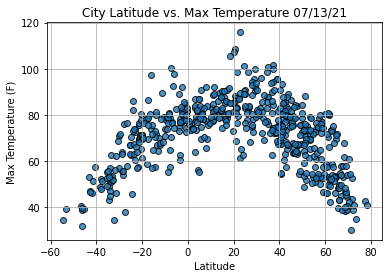

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

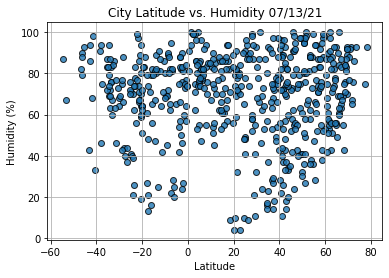

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

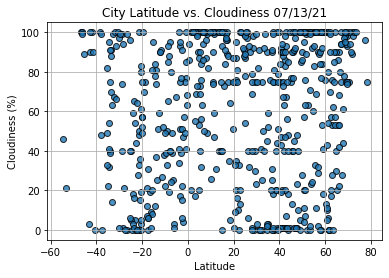

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

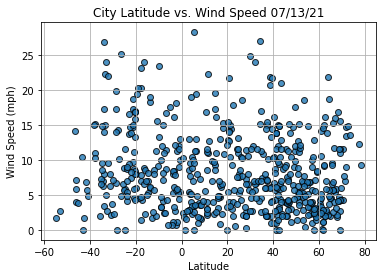

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 

In [19]:
index13 = city_data_df.loc[13]
index13

City                   Nanortalik
Country                        GL
Date          2021-07-13 18:02:38
Lat                       60.1432
Lng                      -45.2371
Max Temp                    46.06
Humidity                       79
Cloudiness                     13
Wind Speed                   2.13
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Albany,US,2021-07-13 18:02:07,42.6001,-73.9662,80.51,83,86,9.46
3,Talaya,RU,2021-07-13 18:02:34,61.3833,152.7500,53.29,90,80,0.11
4,Tuktoyaktuk,CA,2021-07-13 18:02:34,69.4541,-133.0374,44.64,92,98,15.57
7,Norman Wells,CA,2021-07-13 17:58:02,65.2820,-126.8329,71.64,49,20,4.61
8,Jamestown,US,2021-07-13 18:02:36,42.0970,-79.2353,85.08,73,40,14.97


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

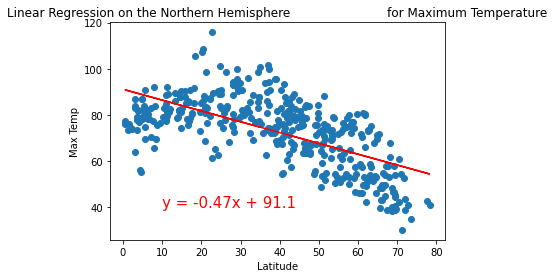

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

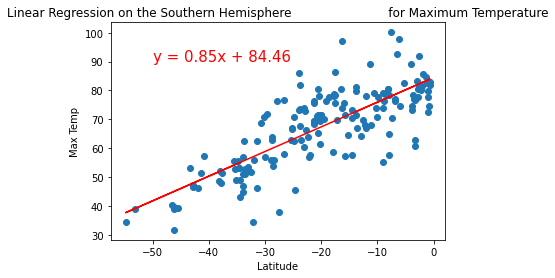

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

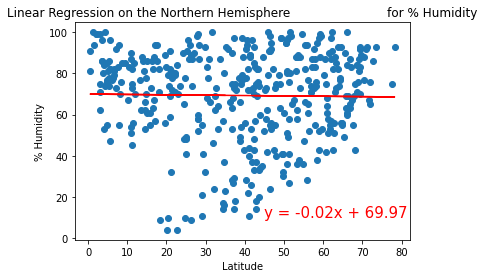

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

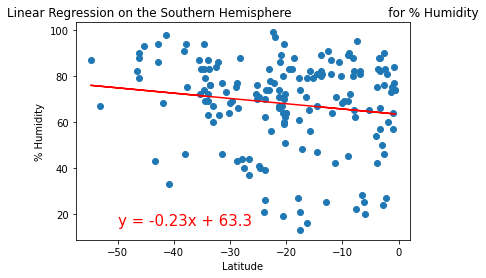

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

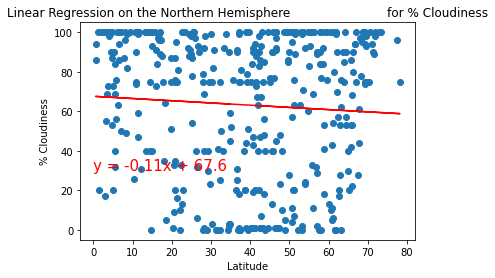

In [40]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,30))

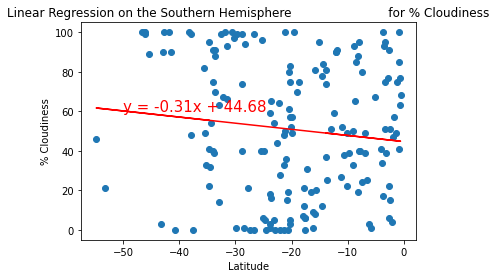

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

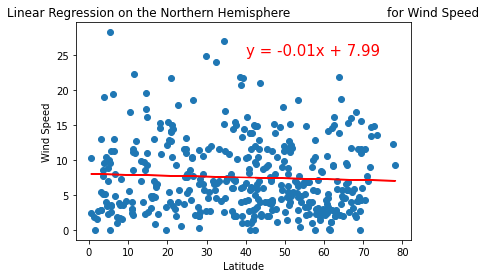

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

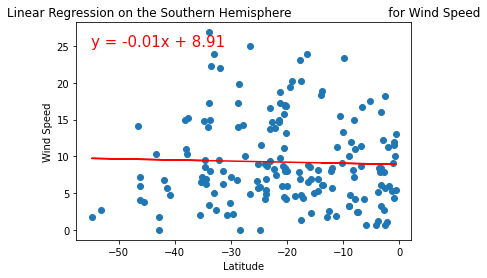

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,25))